In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Pokemon.csv')

In [3]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data['Type 2'].isnull().sum()

386

In [6]:
data['Type 2'] = pd.to_numeric(data['Type 2'], errors='coerce')
data['Type 2']=data['Type 2'].fillna(data['Type 2'].median())

In [7]:
data['Type 2'].isnull().sum()

800

In [11]:
# Handling missing values

#data = data.dropna(axis=1) # To drop columns with any missing values:

data = data.fillna(22)  # Fill missing values with a specific value

In [12]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,22.0,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,22.0,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,22.0,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,22.0,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,22.0,309,39,52,43,60,50,65,1,False


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

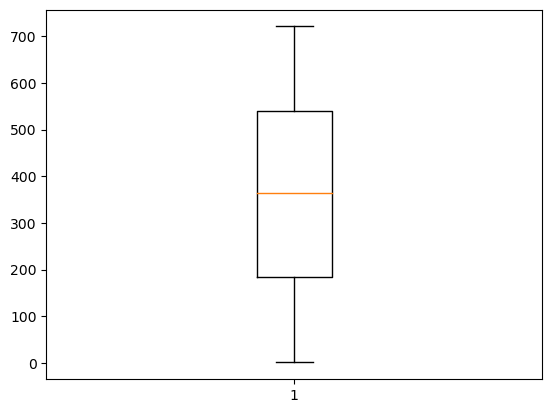

In [13]:
#Create a Box Plot

# Iterate over each column and create box plots to visualize outliers

for column in data.columns:
    plt.boxplot(data[column])
plt.xlabel('variables')
plt.ylabel('value')
plt.title('Box Plot')
plt.show()

In [23]:
# Calculate z-scores for each data point

z_scores = (data - data.mean()) / data.std()

C:\Users\admin\AppData\Local\Temp\ipykernel_4112\1256085057.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = (data - data.mean()) / data.std()
C:\Users\admin\AppData\Local\Temp\ipykernel_4112\1256085057.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = (data - data.mean()) / data.std()


In [24]:
# Define a threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

In [25]:
# Create a boolean mask indicating outliers

outliers_mask = (z_scores > threshold).any(axis=1)

In [26]:
# Get the outliers from the original data
outliers = data[outliers_mask]

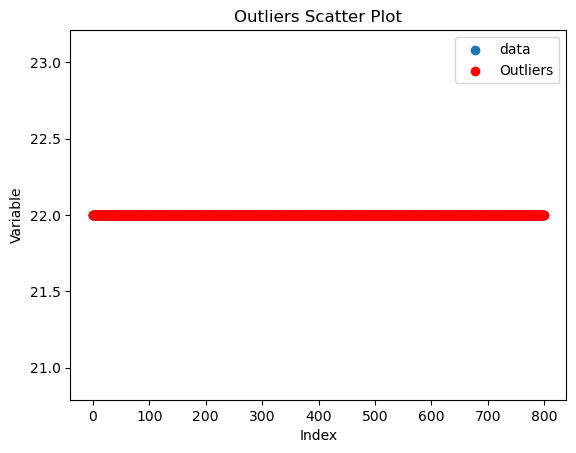

In [14]:
# Create a scatter plot of the data

plt.scatter(data.index, data['Type 2'],label='data')

plt.scatter(data.index, data['Type 2'], color='red', label='Outliers')

plt.xlabel('Index')
plt.ylabel('Variable')
plt.title('Outliers Scatter Plot')
plt.legend()
plt.show()

In [28]:
types= data['Type 2'] == data['Type 2']

In [29]:
types

0      True
1      True
2      True
3      True
4      True
       ... 
795    True
796    True
797    True
798    True
799    True
Name: Type 2, Length: 800, dtype: bool

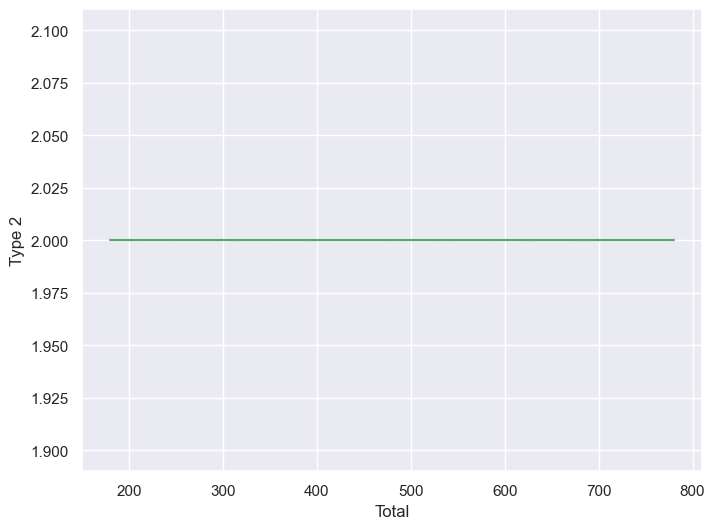

In [30]:
sns.set(rc={'figure.figsize':(8,6)})
sns.lineplot(x='Total',y='Type 2',data=data,color='g')
plt.show()

In [35]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,2.0,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,2.0,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,2.0,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,2.0,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,2.0,309,39,52,43,60,50,65,1,False


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

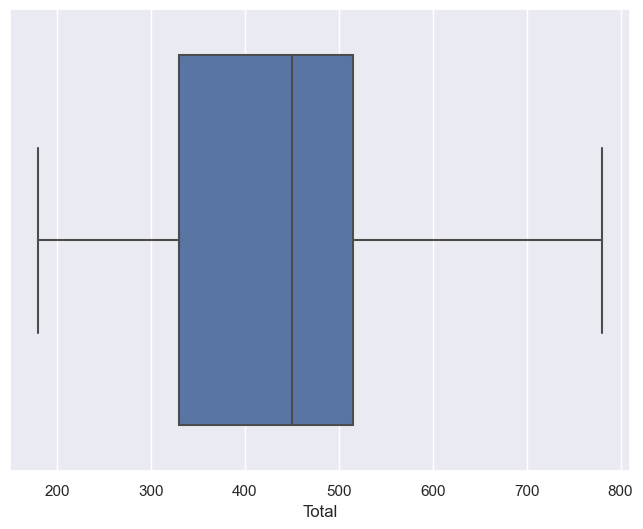

In [36]:
sns.boxplot(data['Total'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

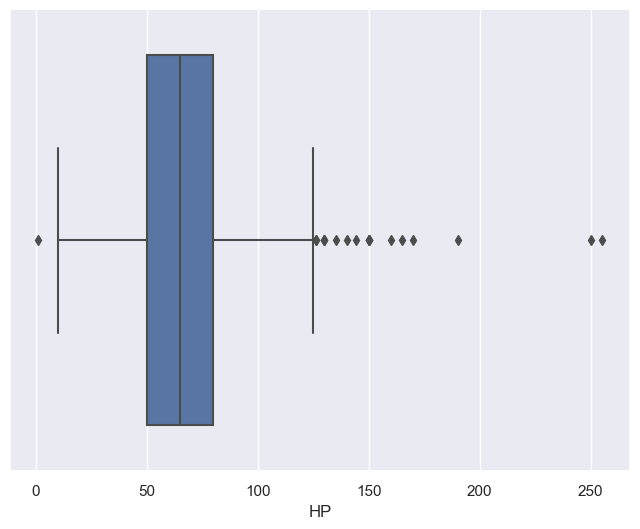

In [37]:
sns.boxplot(data['HP'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Defense'>

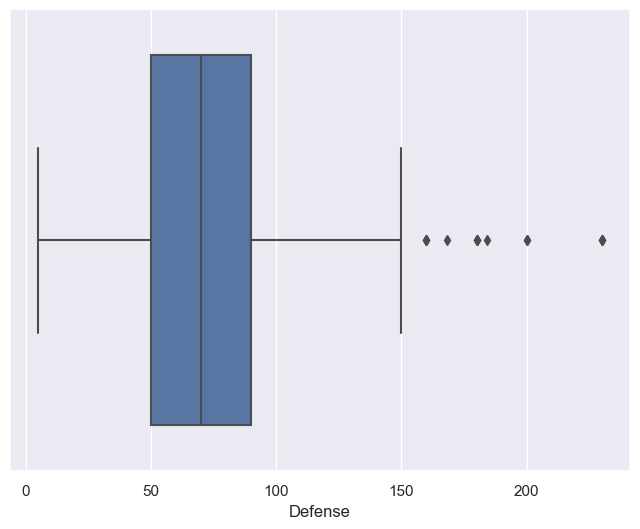

In [42]:
sns.boxplot(data['Defense'])

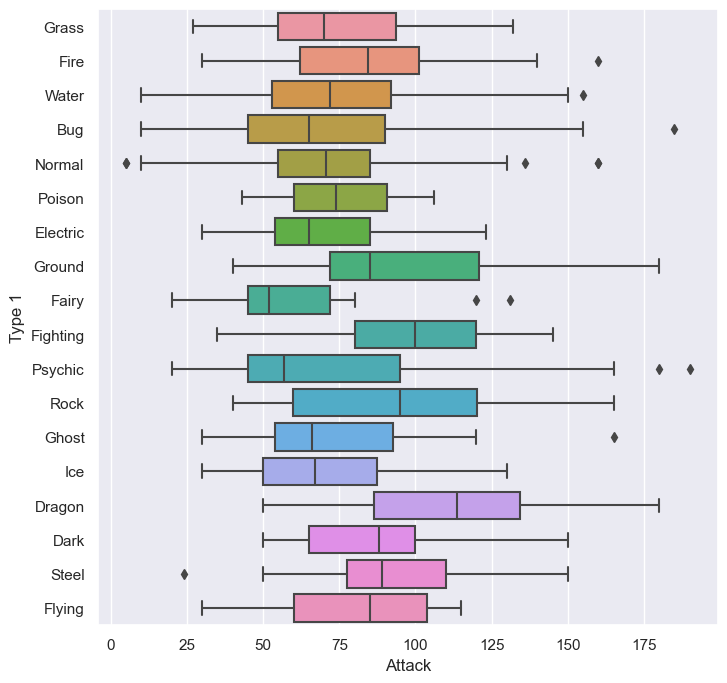

In [51]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Type 1',x='Attack',data=data)
plt.show()

In [58]:
#You can see in above box plot we have a 'Type 1' Column in that we have a 'Bug'. 
#and it has one outlier and it is greater than 175 so we have applied the condition below with a 'Attack' column.

data[(data['Type 1'] == 'Bug') & (data['Attack'] > 175)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
232,214,HeracrossMega Heracross,Bug,2.0,600,80,185,115,40,105,75,2,False


In [59]:
data.drop(232,inplace=True)

In [60]:
data[(data['Type 1'] == 'Fire') & (data['Attack'] > 150)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
279,257,BlazikenMega Blaziken,Fire,2.0,630,80,160,80,130,80,100,3,False


In [61]:
data.drop(279,inplace=True)

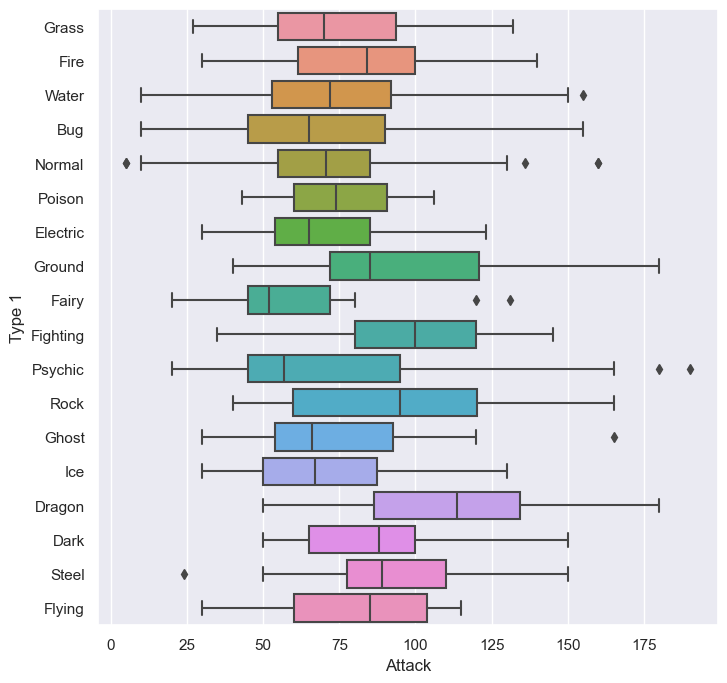

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Type 1',x='Attack',data=data)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type 2'>

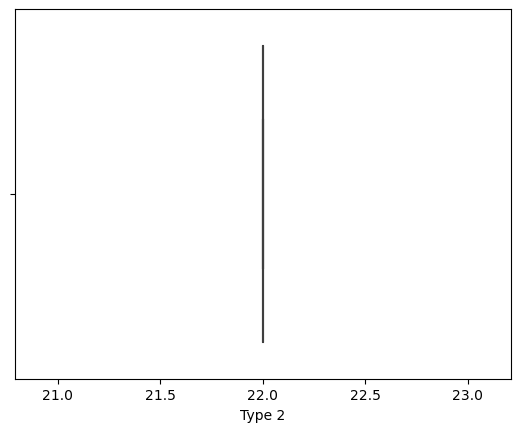

In [15]:
sns.boxplot(data['Type 2'])

In [16]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,22.0,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,22.0,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,22.0,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,22.0,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,22.0,309,39,52,43,60,50,65,1,False


<AxesSubplot:xlabel='Sp. Def', ylabel='Attack'>

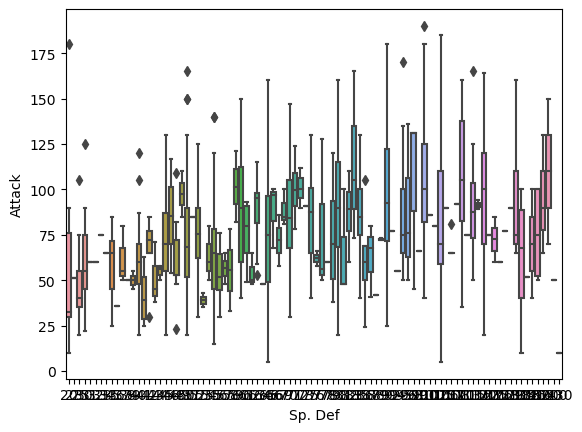

In [24]:
sns.boxplot(x='Sp. Def',y='Attack',data=data)

In [25]:
#IQR for that you need

#Min
#Max
#25% percentile
#75% percentile
#Median

# IQR = Q3 - Q1 Formula (Q3 is your 75% Percentile and Q1 is your 25% percentile) 
#Lower brackate = Q1 - 1.5*(IQR)
#Upper bracker = Q3 + 1.5*(IQR)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


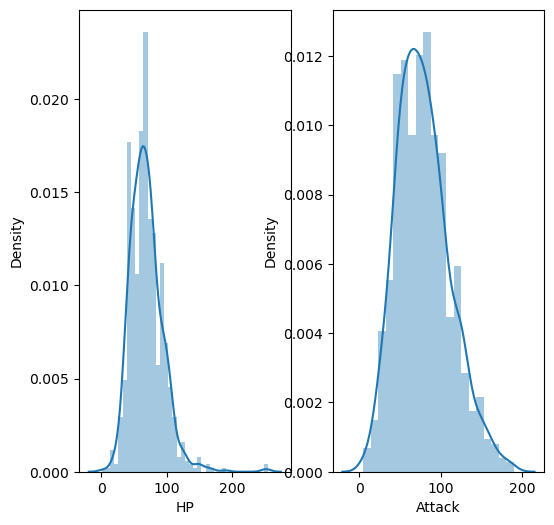

In [37]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
sns.distplot(data['HP'])

plt.subplot(1,2,2)
sns.distplot(data['Attack'])
plt.show()

In [39]:
data['Attack'].skew()

0.5516137480269772

In [40]:
data['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [41]:
data['HP'].describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sp. Atk'>

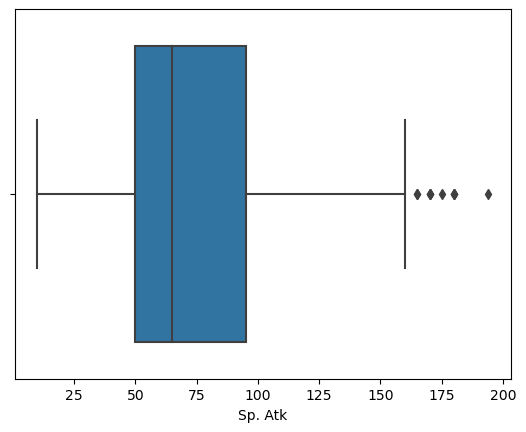

In [48]:
sns.boxplot(data['Sp. Atk'])

In [53]:
#Finding the IQR
Q1 =data['Sp. Atk'].quantile(0.25)
Q3 =data['Sp. Atk'].quantile(0.75)

In [54]:
Q1

49.75

In [55]:
Q3

95.0

In [56]:
data['Sp. Atk'].describe()

count    800.000000
mean      72.820000
std       32.722294
min       10.000000
25%       49.750000
50%       65.000000
75%       95.000000
max      194.000000
Name: Sp. Atk, dtype: float64

In [58]:
# IQR = Q3- Q1

IQR = Q3 - Q1

In [59]:
IQR

45.25

In [60]:
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [61]:
print("Upper Limit is ",UL)
print("Lower Limit is ",LL)

Upper Limit is  162.875
Lower Limit is  -18.125


# Finding Outliers

In [63]:
data[data['Sp. Atk'] > UL]
 
# You can see the outliers in Sp. Atk column 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
71,65,AlakazamMega Alakazam,Psychic,22.0,590,55,50,65,175,95,150,1,False
102,94,GengarMega Gengar,Ghost,22.0,600,60,65,80,170,95,130,1,False
164,150,MewtwoMega Mewtwo Y,Psychic,22.0,780,106,150,70,194,120,140,1,True
196,181,AmpharosMega Ampharos,Electric,22.0,610,90,95,105,165,110,45,2,False
306,282,GardevoirMega Gardevoir,Psychic,22.0,618,68,85,65,165,135,100,3,False
422,382,KyogrePrimal Kyogre,Water,22.0,770,100,150,90,180,160,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,22.0,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,22.0,600,50,180,20,180,20,150,3,True
712,646,KyuremWhite Kyurem,Dragon,22.0,700,125,120,90,170,100,95,5,True
798,720,HoopaHoopa Unbound,Psychic,22.0,680,80,160,60,170,130,80,6,True


In [64]:
data[data['Sp. Atk'] < LL]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


# Trimming 

In [65]:
new_data=data[data['Sp. Atk'] < UL]

In [68]:
new_data.shape

(790, 13)

In [71]:
data['Sp. Atk'].shape

(800,)

# Comparing

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

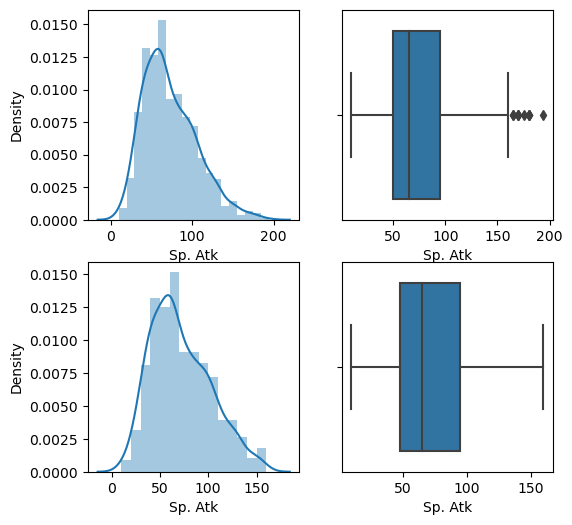

In [73]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.distplot(data['Sp. Atk'])

plt.subplot(2,2,2)
sns.boxplot(data['Sp. Atk'])

plt.subplot(2,2,3)
sns.distplot(new_data['Sp. Atk'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Sp. Atk'])
plt.show()

# Capping

In [74]:
# Make a copy of data and get into the new variable.
new_data_cap = data.copy()

#Here we're checking that if 'Sp. Atk' coumns data has greater that UL if yes
#then we are converting that into UL
#likewise we're checking 'Sp. Atk' is lower than LL then we converting into LL 
#if not then we're putting that as it is.

new_data_cap['Sp. Atk'] = np.where(new_data_cap['Sp. Atk'] > UL,UL, 
                                  np.where(new_data_cap['Sp. Atk'] < LL,LL,new_data_cap['Sp. Atk']))

In [76]:
new_data_cap.shape

(800, 13)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

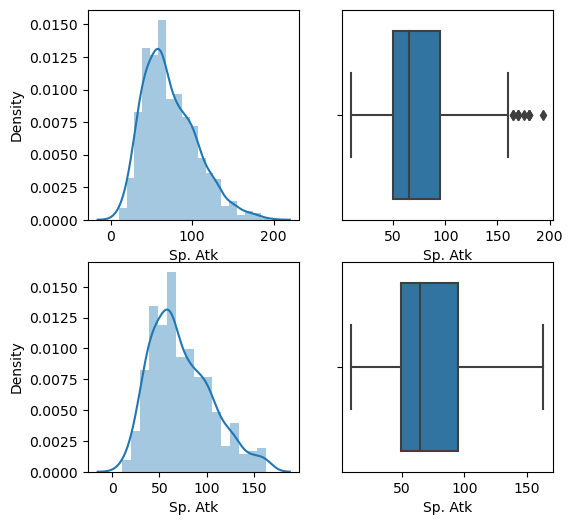

In [77]:
#Comparing 

plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.distplot(data['Sp. Atk'])

plt.subplot(2,2,2)
sns.boxplot(data['Sp. Atk'])

plt.subplot(2,2,3)
sns.distplot(new_data_cap['Sp. Atk'])

plt.subplot(2,2,4)
sns.boxplot(new_data_cap['Sp. Atk'])
plt.show()